# <center> CM4603 – Coursework 1 (Group) </center>

**Group: D**

Name 1: Mishaal Rifath | 
IIT ID: 20210822 | 
RGU ID: 2118518

Name 2: Tharani Dissanayake | 
IIT ID: 20210157 | 
RGU ID: < insert your RGU ID >

Name 3: Lisara Gajaweera | 
IIT ID: 20211029 | 
RGU ID: < insert your RGU ID >

***

## Introduction

Imports and Settings

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk import WordNetLemmatizer, word_tokenize, ngrams
from nltk.tokenize import WordPunctTokenizer, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
import spacy
from langdetect import detect
import emoji
from transformers import BertTokenizer
import sentencepiece as spm
import inflect
import contractions
from tokenizers import Tokenizer
from tokenizers.models import BPE, WordPiece
from tokenizers.trainers import BpeTrainer, WordPieceTrainer
from tokenizers.pre_tokenizers import Whitespace
import random
import torch
from wordcloud import WordCloud
from nltk.util import ngrams

In [2]:
np.random.seed(42)
random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

In [3]:
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\misha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\misha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

***

## <center> Task 1: Data Collection, Cleaning & EDA </center>

### Data Collection Methodology
In this initial task, we focused on assembling a comprehensive and representitive dataset of TripAdvisor hotel reviews for hotels in Sri Lanka. In order to ensure this, a stratified sampling strategy was created, with the following criteria:
- Reviews taken from 6 regions
- 40 hotels would be taken from each region
- For each hotel, 50 reviews would be taken
- The 50 reviews would be distributed among the different star ratings (10 reviews per rating)


Due to restrictions from TripAdvisor's end traditional web scraping libraries (BeautifulSoup, Scrapy, Selenium, etc.) could not be employed. Hence, a third party API [Apify](https://apify.com/) was used.

Limitations in usage led to batch data scraping which resulted in 7 different datasets for each region.

In [3]:
# reading the raw individual scaped datasets
colombo = pd.read_csv('data/raw/dataset_colombo_raw.csv')
east = pd.read_csv('data/raw/dataset_east_raw.csv')
ella = pd.read_csv('data/raw/dataset_ella_raw.csv')
galle = pd.read_csv('data/raw/dataset_galle_raw.csv')
kandy = pd.read_csv('data/raw/dataset_kandy_raw_1.csv')
nuwaraeliya = pd.read_csv('data/raw/dataset_nuwaraeliya_raw.csv')

C:\Users\misha\AppData\Local\Temp\ipykernel_912\285257961.py:2: DtypeWarning: Columns (473,531,589,621,623,626,629,632,635,638,641,644,647,650,652,655,658,661,664,667,670,673,676,679,681,684,687,690,693,696,699,702,705,708,710,713,716,719,722,725,728,731,734,737,739,742,745,748,751,754,757,760,763,766,768,771,774,777,780,783,786,789,792,795,797,800,803,806,809,812,815,818,821,824,826,829,832,835,838,841,844,847,850,853,855,858,861,864,867,870,873,876,879,881,884,887,890,893,896,899,902,905,907,910,913,916,919,922,925,928) have mixed types. Specify dtype option on import or set low_memory=False.
  colombo = pd.read_csv('data/raw/dataset_colombo_raw.csv')
C:\Users\misha\AppData\Local\Temp\ipykernel_912\285257961.py:4: DtypeWarning: Columns (357,389,391,394,397,400,403,406,409,412,415,418,420,423,426,429,432,435,438,441,444,447,449,452,455,458,461,464,467,470,473,476,478,481,484,487,490,493,496,499,502,505,507,510,513,516,519,522,525,528,531,534,536,539,542,545,548,551,554,557,560,563,565

In [4]:
# print the shape of the datasets
colombo.shape, east.shape, ella.shape, galle.shape, kandy.shape, nuwaraeliya.shape

((2000, 1012), (1846, 91), (1951, 870), (2100, 1992), (2000, 90), (1932, 1011))

Since the third party API scraped a lot of metadata, a manual filteration of the relevant columns must be performed before merging the data together

In [5]:
kandy.columns.tolist()

['helpfulVotes',
 'id',
 'lang',
 'locationId',
 'ownerResponse',
 'ownerResponse/connectionToSubject',
 'ownerResponse/id',
 'ownerResponse/lang',
 'ownerResponse/publishedDate',
 'ownerResponse/responder',
 'ownerResponse/text',
 'placeInfo/address',
 'placeInfo/addressObj/city',
 'placeInfo/addressObj/country',
 'placeInfo/addressObj/postalcode',
 'placeInfo/addressObj/state',
 'placeInfo/addressObj/street1',
 'placeInfo/addressObj/street2',
 'placeInfo/id',
 'placeInfo/latitude',
 'placeInfo/locationString',
 'placeInfo/longitude',
 'placeInfo/name',
 'placeInfo/numberOfReviews',
 'placeInfo/rating',
 'placeInfo/ratingHistogram/count1',
 'placeInfo/ratingHistogram/count2',
 'placeInfo/ratingHistogram/count3',
 'placeInfo/ratingHistogram/count4',
 'placeInfo/ratingHistogram/count5',
 'placeInfo/webUrl',
 'placeInfo/website',
 'publishedDate',
 'publishedPlatform',
 'rating',
 'roomTip',
 'subratings/0/name',
 'subratings/0/value',
 'subratings/1/name',
 'subratings/1/value',
 'subra

In [6]:
kandy.head()

,helpfulVotes,id,lang,locationId,ownerResponse,ownerResponse/connectionToSubject,ownerResponse/id,ownerResponse/lang,ownerResponse/publishedDate,ownerResponse/responder,...,user/contributions/helpfulVotes,user/contributions/totalContributions,user/link,user/name,user/userId,user/userLocation,user/userLocation/id,user/userLocation/name,user/userLocation/shortName,user/username
0,0,972640226,en,4173413,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,www.tripadvisor.com/Profile/homea575,Home A,C8DEEF169BD0B06A7116F5AA8CBEE505,NaN,NaN,NaN,NaN,homea575
1,0,942345342,en,4173413,NaN,NaN,NaN,NaN,NaN,NaN,...,1,20,www.tripadvisor.com/Profile/R5273HHvalentind,Valentin D,74A8DBD1CFC8AB82944759ED1DE3E355,NaN,NaN,NaN,NaN,R5273HHvalentind
2,0,932695686,en,4173413,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,www.tripadvisor.com/Profile/dinast2024,Dinas T,6984DC788123C57BB9DB35B5F53E8CE9,NaN,NaN,NaN,NaN,dinast2024
3,0,919333160,en,4173413,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,www.tripadvisor.com/Profile/madhawar2016,Madhawa R,9CEC5C98C2A8732A9E9C71E3A79113E8,NaN,293962.0,"Colombo, Sri Lanka",Colombo,madhawar2016
4,0,914641015,en,4173413,NaN,NaN,NaN,NaN,NaN,NaN,...,0,12,www.tripadvisor.com/Profile/315chinthakaw,Chinthaka W,DA2EAB222D26CBEAC097EFCB1EB671FD,NaN,NaN,NaN,NaN,315chinthakaw


In [7]:
# based on manual analysis of the scraped data, the following columns were deemed relevant for analysis and future use
useful_columns = [
    'helpfulVotes',
    'id',
    'placeInfo/address',
    'placeInfo/addressObj/city',
    'placeInfo/name',
    'placeInfo/numberOfReviews',
    'placeInfo/rating',
    'placeInfo/webUrl',
    'publishedDate',
    'rating',
    'roomTip',
    'text',
    'title',
    'travelDate',
    'tripType',
    'user/username',
]

In [8]:
# filter dataframes to only include useful columns
colombo = colombo[useful_columns]
east = east[useful_columns]
ella = ella[useful_columns]
galle = galle[useful_columns]
kandy = kandy[useful_columns]
nuwaraeliya = nuwaraeliya[useful_columns]

# check shape of dataframes after filteration
colombo.shape, east.shape, ella.shape, galle.shape, kandy.shape, nuwaraeliya.shape 

((2000, 16), (1846, 16), (1951, 16), (2100, 16), (2000, 16), (1932, 16))

In [9]:
# Concatenate dataframes
raw_data = pd.concat([colombo, east, ella, galle, kandy, nuwaraeliya])
raw_data.shape

(11829, 16)

In [13]:
# renaming columns to be more readable
column_names = {
    'helpfulVotes': 'helpfulVotes',
    'id': 'id',
    'placeInfo/address': 'address',
    'placeInfo/addressObj/city': 'city',
    'placeInfo/name': 'placeName',
    'placeInfo/numberOfReviews': 'numberOfReviews',
    'placeInfo/rating': 'placeRating',
    'placeInfo/webUrl': 'webUrl',
    'publishedDate': 'publishedDate',
    'rating': 'userRating',
    'roomTip': 'roomTip',
    'text': 'review_text',
    'title': 'review_title',
    'travelDate': 'travelDate',
    'tripType': 'tripType',
    'user/username': 'username',
}

raw_data = raw_data.rename(columns=column_names)

In [14]:
raw_data.head()

,helpfulVotes,id,address,city,placeName,numberOfReviews,placeRating,webUrl,publishedDate,userRating,roomTip,review_text,review_title,travelDate,tripType,username
0,0.0,978474125.0,"24 Dharmapala Mawatha Dharmapala Mawatha, Colo...",Colombo,Nh Collection Colombo,2392,4.5,https://www.tripadvisor.com/Hotel_Review-g2939...,2024-11-03,5.0,Great place,Very good service at Ayu and friendly staff. S...,Experience at Ayu,2024-11,SOLO,219nikal
1,0.0,978053018.0,"24 Dharmapala Mawatha Dharmapala Mawatha, Colo...",Colombo,Nh Collection Colombo,2392,4.5,https://www.tripadvisor.com/Hotel_Review-g2939...,2024-10-30,1.0,NaN,Change u r lady manager of u r hotel morning s...,Change u r lady manager of u r hotel morning s...,2024-10,BUSINESS,rajacool1984itz
2,0.0,976992067.0,"24 Dharmapala Mawatha Dharmapala Mawatha, Colo...",Colombo,Nh Collection Colombo,2392,4.5,https://www.tripadvisor.com/Hotel_Review-g2939...,2024-10-28,5.0,NaN,Just Perfect \nWe liked everything.\nStaffs ar...,Amazed !,2024-10,FAMILY,857navidj
3,0.0,976690540.0,"24 Dharmapala Mawatha Dharmapala Mawatha, Colo...",Colombo,Nh Collection Colombo,2392,4.5,https://www.tripadvisor.com/Hotel_Review-g2939...,2024-10-26,5.0,NaN,Our stay was unforgettable! The hotel was beau...,Wonderful stay,2024-10,FAMILY,809mickaelt
4,0.0,976664122.0,"24 Dharmapala Mawatha Dharmapala Mawatha, Colo...",Colombo,Nh Collection Colombo,2392,4.5,https://www.tripadvisor.com/Hotel_Review-g2939...,2024-10-26,5.0,NaN,Amazing hotel very well situated in Colombo! Y...,Amazing hotel !,2024-10,FAMILY,M1879HRchloet


In [15]:
# raw_data.to_csv('data/dataset_raw.csv', index=False)

### Data Cleaning

Once the data was collected, we performed thorough data cleaning to ensure data quality and consistency for subsequent analyses. 


The cleaning process involved several critical steps:

1. **Duplicate Removal:**
   - **Action:** We inspected the `review_text` column for duplicate entries.
   - **Outcome:** Identified and removed **1 duplicate** review to prevent redundancy in our analysis.

2. **Handling Missing Data:**
   - **Action:** Checked for missing values in the `review_text` column.
   - **Outcome:** Removed **1 row** where the `review_text` was missing, ensuring that all remaining entries contained valid review content.

3. **Text Normalization:**
   - **Lowercasing:**
     - **Action:** Converted all characters in `review_text` to lowercase.
     - **Outcome:** Standardized the text to eliminate case sensitivity issues.

   - **Removing HTML Tags and Special Characters:**
     - **Action:** Stripped away any HTML tags and special characters from the reviews.
     - **Outcome:** Cleaned the text of formatting artifacts that could interfere with text processing.

   - **Removing URLs & Emails:**
     - **Action:** Eliminated any URLs and email addresses present in the reviews.
     - **Outcome:** Removed irrelevant links and contact information, focusing solely on the review content.

   - **Emoji Detection:**
     - **Action:** Scanned the `review_text` for emojis.
     - **Outcome:** Confirmed that there were **no emojis** in the dataset, simplifying text analysis by avoiding the need to handle emoji encoding.

   - **Handling Line Breaks:**
     - **Action:** Managed and standardized line breaks within the `review_text`.
     - **Outcome:** Ensured that reviews were formatted consistently without abrupt or irregular line separations.

   - **Expanding Contractions:**
     - **Action:** Expanded contractions (e.g., "don't" to "do not") in the reviews.
     - **Outcome:** Enhanced the clarity and uniformity of the text, aiding in more accurate tokenization and analysis.

   - **Inflecting Numbers to Words:**
     - **Action:** Converted numerical digits to their corresponding word forms (e.g., "2" to "two").
     - **Outcome:** Maintained textual consistency and improved the semantic understanding of numerical references.

   - **Removing Stopwords:**
     - **Action:** Filtered out common English stopwords (e.g., "the," "and," "is") from the reviews.
     - **Outcome:** Reduced noise in the data, allowing models to focus on more meaningful words that contribute to sentiment and topic identification.

   - **Lemmatization:**
     - **Action:** Applied lemmatization to reduce words to their base or dictionary forms (e.g., "running" to "run").
     - **Outcome:** Normalized the text, facilitating better recognition of word relationships and improving the efficiency of feature extraction.

   - **Dropping Non-English Reviews:**
     - **Action:** Identified and removed reviews written in languages other than English.
     - **Outcome:** Ensured that the dataset was linguistically uniform, which is essential for consistent analysis and modeling.

   - **Whitespace Normalization:**
     - **Action:** Standardized whitespace by removing excessive spaces and ensuring consistent spacing between words.
     - **Outcome:** Achieved a clean and uniform text format, which is crucial for accurate tokenization and vectorization.

In [5]:
df = pd.read_csv("data/dataset_raw.csv")
df.head()

,helpfulVotes,id,address,city,placeName,numberOfReviews,placeRating,webUrl,publishedDate,userRating,roomTip,review_text,review_title,travelDate,tripType,username
0,0.0,978474125.0,"24 Dharmapala Mawatha Dharmapala Mawatha, Colo...",Colombo,Nh Collection Colombo,2392,4.5,https://www.tripadvisor.com/Hotel_Review-g2939...,2024-11-03,5.0,Great place,Very good service at Ayu and friendly staff. S...,Experience at Ayu,2024-11,SOLO,219nikal
1,0.0,978053018.0,"24 Dharmapala Mawatha Dharmapala Mawatha, Colo...",Colombo,Nh Collection Colombo,2392,4.5,https://www.tripadvisor.com/Hotel_Review-g2939...,2024-10-30,1.0,NaN,Change u r lady manager of u r hotel morning s...,Change u r lady manager of u r hotel morning s...,2024-10,BUSINESS,rajacool1984itz
2,0.0,976992067.0,"24 Dharmapala Mawatha Dharmapala Mawatha, Colo...",Colombo,Nh Collection Colombo,2392,4.5,https://www.tripadvisor.com/Hotel_Review-g2939...,2024-10-28,5.0,NaN,Just Perfect \nWe liked everything.\nStaffs ar...,Amazed !,2024-10,FAMILY,857navidj
3,0.0,976690540.0,"24 Dharmapala Mawatha Dharmapala Mawatha, Colo...",Colombo,Nh Collection Colombo,2392,4.5,https://www.tripadvisor.com/Hotel_Review-g2939...,2024-10-26,5.0,NaN,Our stay was unforgettable! The hotel was beau...,Wonderful stay,2024-10,FAMILY,809mickaelt
4,0.0,976664122.0,"24 Dharmapala Mawatha Dharmapala Mawatha, Colo...",Colombo,Nh Collection Colombo,2392,4.5,https://www.tripadvisor.com/Hotel_Review-g2939...,2024-10-26,5.0,NaN,Amazing hotel very well situated in Colombo! Y...,Amazing hotel !,2024-10,FAMILY,M1879HRchloet


In [6]:
# remove duplicate reviews
duplicates = df.duplicated(subset=['review_text'])
print("Number of duplicate reviews removed:", df[df.duplicated(subset=['review_text'])].shape[0])

df = df[~duplicates]

Number of duplicate reviews removed: 1


In [7]:
# check for missing data
print(f"Number of missing data: \n{df.isnull().sum()}")

Number of missing data: 
helpfulVotes          1
id                    1
address               0
city                 50
placeName             0
numberOfReviews       0
placeRating           1
webUrl                0
publishedDate         1
userRating            1
roomTip            9839
review_text           1
review_title          1
travelDate           10
tripType             10
username              1
dtype: int64


In [8]:
# check null rows for review_text column
df[df['review_text'].isnull()]

,helpfulVotes,id,address,city,placeName,numberOfReviews,placeRating,webUrl,publishedDate,userRating,roomTip,review_text,review_title,travelDate,tripType,username
9917,NaN,NaN,"No 09 Little England, Nuwara Eliya 22200 Sri L...",Nuwara Eliya,Swiss Cottage Nuwara Eliya,0,NaN,https://www.tripadvisor.com/Hotel_Review-g6085...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# drop null row
df.dropna(subset=['review_text'], inplace=True)

In [10]:
df.isnull().sum()

helpfulVotes          0
id                    0
address               0
city                 50
placeName             0
numberOfReviews       0
placeRating           0
webUrl                0
publishedDate         0
userRating            0
roomTip            9838
review_text           0
review_title          0
travelDate            9
tripType              9
username              0
dtype: int64

In [11]:
# convert to lowercase
df['review_text'] = df['review_text'].str.lower()

In [12]:
# remove HTML tags
df['review_text'] = df['review_text'].str.replace(r'<.*?>', ' ', regex=True)

In [13]:
# remove URLs & emails
df['review_text'] = df['review_text'].str.replace(r'http\S+|www.\S+|\S+@\S+', ' ', regex=True)

In [14]:
# remove special characters
df['review_text'] = df['review_text'].str.replace(r'[^\w\s]', ' ', regex=True)

In [15]:
# check the reviews for emojis using emoji library
def contains_emoji(text):
    return emoji.emoji_count(text) > 0

print(f"Review titles with emojis: {df['review_title'].apply(contains_emoji).sum()}")
print(f"Review text with emojis: {df['review_text'].apply(contains_emoji).sum()}")

Review titles with emojis: 177
Review text with emojis: 0


In [16]:
# handling line breaks
lb_count = df['review_text'].str.contains('\n').sum()

df['review_text'] = df['review_text'].str.replace('\n', ' ')

print(f"Number of line breaks before: {lb_count}")
print("Number of line breaks after: ", df['review_text'].str.contains('\n').sum())

Number of line breaks before: 5199
Number of line breaks after:  0


In [17]:
# expand contractions
df['review_text'] = df['review_text'].apply(lambda x: contractions.fix(x))

In [18]:
# dealing with numbers (inflecting numbers to words) 
p = inflect.engine()

# Function to replace numbers with words
def convert_numbers_to_words(text):
    return ' '.join([p.number_to_words(word) if word.isdigit() else word for word in text.split()])

df['review_text'] = df['review_text'].apply(convert_numbers_to_words)

In [19]:
# removing stopwords
stop_words = set(stopwords.words('english'))

# check stopword count in review_text column
pre_sw_count = df['review_text'].apply(lambda x: len([w for w in x.split() if w in stop_words])).sum()

df['review_text'] = df['review_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

post_sw_count = df['review_text'].apply(lambda x: len([w for w in x.split() if w in stop_words])).sum()

print(f"Number of stop words before: {pre_sw_count}")
print(f"Number of stop words after: {post_sw_count}")

Number of stop words before: 518762
Number of stop words after: 0


In [20]:
# lemmatization
lemmatizer = WordNetLemmatizer()
df['review_text'] = df['review_text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [21]:
# handling multilingual data
df['language'] = df['review_text'].apply(detect)
df['language'].value_counts()

language
en    11806
fr        4
af        2
it        2
he        2
da        2
ta        1
nl        1
ja        1
pl        1
sk        1
es        1
sv        1
ar        1
et        1
Name: count, dtype: int64

In [22]:
df.loc[df['language'] != 'en', ['id', 'review_text', 'language']]

,id,review_text,language
531,978318618.0,ம ற ஜ வ ட த ய ல அன த த வசத கள ம ச றப ப க இர ந ...,ta
559,973182740.0,cinnamon best restaurant five star hotel sri l...,fr
1493,941314887.0,bad room tile floor broken room like ghost roo...,af
1718,663911918.0,clean functional convenient boutique capsule c...,fr
2089,485911118.0,awesome arugam bay never many yummy meal break...,it
2832,974598907.0,load insect room change room even 2nd room ins...,nl
3051,395484171.0,stayed two night comfortable affordable people...,ja
3273,502935778.0,fajne miejsce super lokalizacja wszędzie blisk...,pl
4189,963411238.0,nice experience amazing hotel good service sta...,he
4438,821759456.0,bandra kindly man always smile room big comfor...,he


In [23]:
# keep english reviews only
df = df[df['language'] == 'en']
df.drop(columns=['language'], inplace=True)

In [24]:
# normalize whitespace
df['review_text'] = df['review_text'].apply(lambda x: ' '.join(x.split()))

In [26]:
# df.to_csv('data/dataset_cleaned.csv', index=False)

##### Interpretation of Data Cleaning

The comprehensive data cleaning process significantly enhanced the quality and reliability of our dataset. By removing duplicates and handling missing values, we ensured that each review contributed uniquely to our analysis, eliminating redundancy and incomplete data points.

Text normalization steps, including lowercasing, removing HTML tags, special characters, URLs, and emails, streamlined the textual content, making it more suitable for computational processing. The absence of emojis simplified the sentiment analysis by focusing solely on textual cues without the need to interpret graphical symbols.

Expanding contractions and converting numbers to words improved the semantic clarity of the reviews, which is vital for accurate sentiment and topic modeling. The removal of stopwords and lemmatization further refined the text, reducing noise and emphasizing words that carry significant meaning related to customer sentiments and hotel aspects.

By excluding non-English reviews, we maintained linguistic consistency across the dataset, which is essential for the effectiveness of our machine learning models. Whitespace normalization ensured that the text was uniformly formatted, facilitating efficient tokenization and feature extraction in subsequent tasks.

Overall, the meticulous data cleaning efforts laid a robust foundation for feature extraction, sentiment analysis, and topic modeling, ensuring that our analyses were based on high-quality, consistent, and meaningful data.

***

### Exploratory Data Analysis

Next, an extensive EDA was conducted on both the raw and cleaned data to uncover underlying patterns, distributions, and relationships within the data.

The EDA encompassed the following tasks:
1. **Dataset Overview**:
    - **Total Number of Reviews**: Calculated the total number of reviews in the dataset.
    - **Unique Hotels and Users**: Identified the number of unique hotels and users in the dataset.
    - **Average Number of Reviews per Hotel**: Computed the average number of reviews each hotel received.

2. **Review Text Analysis**:
    - **Review Length Statistics**: Analyzed the length of reviews by calculating descriptive statistics such as mean, median and standard deviation.
    - **Distribution of Review Lengths**: Plotted a histogram to visualize the distribution of review lengths.
    - **Common Words & Bigrams**: Identified and ranked the most frequent single words and bigrams across all reviews.
    - **Vocabulary Size & Unique Word Ratio**: Determined the size of the vocabulary and the ratio of unique words to total words in the dataset.
    - **Word Counts for Sentiment Words**: Counted occurances of specific sentiment-related words: "good", "bad", "amazing", "terrible".
    - **Part-of-Speech Tagging Analysis**: Performed POS tagging on the reviews to analyze the grammatical structure.

3. **Temporal Analysis**:
    - **Review Publication Dates**: Analyzed the distribution of review publication dates to identify any patterns or trends.

4. **Visualizations**:
    - **Word Cloud**: Created a word cloud to visualize the most prominent words used in the reviews.

5. **Frequency Distribution Analysis**:
    - **Single-Level Analysis**:
        - **Reviews per City**
        - **Reviews per Trip Type**
        - **Reviews per Place Rating**
        - **Reviews per User Rating**

    - **Multi-Level Analysis**:
        - **User Ratings per Trip Type**
        - **Heatmap of User Rating vs Place Rating**


In [38]:
df_raw = pd.read_csv('data/dataset_raw.csv')
df_clean = pd.read_csv('data/dataset_cleaned.csv')

In [49]:
"""Dataset Overview"""

def overview(df, dataset_name):
    """
    Prints an overview of the dataset
    """
    
    print(f"Dataset Overview of {dataset_name} dataset \n------")
    print(f"Total number of reviews: {df.shape[0]}")
    print(f"Unique hotels: {df['placeName'].nunique()}")
    print(f"Average reviews per hotel: {df.groupby('placeName')['review_text'].count().mean()}")
    print(f"Unique users: {df['username'].nunique()}")
    print(f"Average reviews per user: {df.groupby('username')['review_text'].count().mean()}")
    print(f"Average rating per hotel: {df.groupby('placeName')['userRating'].mean().mean()}")
    print()
    
overview(df_raw, "raw")
overview(df_clean, "clean")    

Dataset Overview of raw dataset 
------
Total number of reviews: 11829
Unique hotels: 240
Average reviews per hotel: 49.28333333333333
Unique users: 11198
Average reviews per user: 1.0562600464368637
Average rating per hotel: 4.4496425627290925

Dataset Overview of clean dataset 
------
Total number of reviews: 11806
Unique hotels: 239
Average reviews per hotel: 49.39748953974895
Unique users: 11177
Average reviews per user: 1.0562762816498166
Average rating per hotel: 4.449374438743097



In [ ]:
"""Review Text Analysis"""

def plot_histogram(data, title, x_label, y_label):
    """
    Plots a histogram of the data
    """
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=50)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    
def get_common_words_and_bigrams(data, n=10):
    """
    Prints top n most common words and bigrams
    """
    all_text = ' '.join(data.dropna()).split()
    word_freq = Counter(all_text).most_common(n)
    
    bigrams = ngrams(all_text, 2)
    bigram_freq = Counter(bigrams).most_common(n)
    
    print(f"Top {n} most common words: \n{word_freq}")
    print(f"Top {n} most common bigrams: \n{bigram_freq}")
    
def get_vocab_size_and_unique_word_ratio(data):
    """
    Prints vocab size and unique word ratio
    """
    all_text = ' '.join(data.dropna()).split()
    vocab_size = len(set(all_text))
    unique_word_ratio = len(all_text) / vocab_size
    print(f"\nVocab size: {vocab_size}")
    print(f"Unique word ratio: {unique_word_ratio}")
    
def get_sentiment_word_counts(data, sentiment_words = ['good', 'bad', 'amazing', 'terrible']):
    """
    Prints sentiment word counts
    """
    all_text = ' '.join(data.dropna()).split()
    sentiment_word_counts = {word: all_text.count(word) for word in sentiment_words}
    print(f"Sentiment Word Counts: {sentiment_word_counts}")
    
def pos_tagging_analysis(data):
    """
    POS tags the reviews and prints the distribution of POS tags
    """
    all_text = ' '.join(data.dropna()).split()
    pos_tags = nltk.pos_tag(all_text)
    pos_tag_counts = Counter(tag for _, tag in pos_tags)
    print(f"POS Tag Distribution: {pos_tag_counts}") 

def review_text_analysis(df, dataset_name):
    """
    Prints a review text analysis of the dataset
    """
    print(f"------\nReview Text Analysis of {dataset_name} dataset\n------") 
    review_length = df['review_text'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)
    
    # print review len stats
    print(f"Review length statistics \n{review_length.describe()}")
    # plot distribution of review len
    plot_histogram(review_length, f"Review Length Histogram of {dataset_name} dataset", "Review Length", "Frequency")
    # common words and bigrams identified
    get_common_words_and_bigrams(df['review_text'], 10)
    # vocab size & unique word ratio
    get_vocab_size_and_unique_word_ratio(df['review_text'])
    
    # word counts of sentiment words
    get_sentiment_word_counts(df['review_text'])
    
    # pos tagging analysis
    pos_tagging_analysis(df['review_text'])

Review Text Analysis of raw dataset 
------
Review length statistics 
count    11829.000000
mean        91.961451
std         79.909159
min          0.000000
25%         47.000000
50%         64.000000
75%        107.000000
max       1955.000000
Name: review_text, dtype: float64


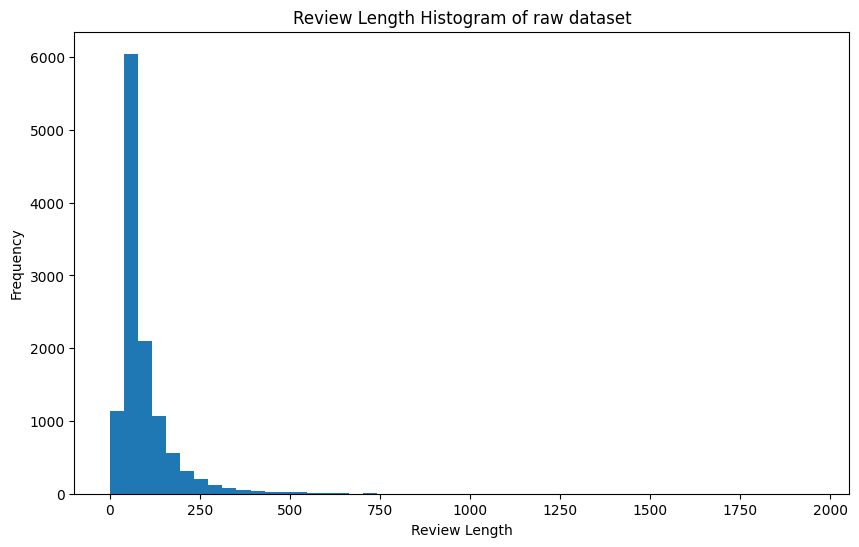

Top 10 most common words: 
[('the', 51947), ('and', 46207), ('a', 26901), ('to', 26395), ('was', 20687), ('The', 15765), ('is', 15588), ('of', 15212), ('in', 14447), ('for', 12879)]
Top 10 most common bigrams: 
[(('in', 'the'), 4597), (('and', 'the'), 4568), (('of', 'the'), 4505), (('to', 'the'), 3418), (('from', 'the'), 2400), (('on', 'the'), 2221), (('at', 'the'), 2199), (('with', 'a'), 2053), (('is', 'a'), 1991), (('had', 'a'), 1862)]

Vocab size: 52084
Unique word ratio: 20.8857230627448
Sentiment Word Counts: {'good': 4142, 'bad': 274, 'amazing': 1706, 'terrible': 74}
POS Tag Distribution: Counter({'NN': 199593, 'DT': 116012, 'JJ': 110135, 'IN': 106735, 'NNP': 68085, 'RB': 64861, 'VBD': 62571, 'CC': 55669, 'PRP': 54524, 'VB': 36825, 'NNS': 33796, 'TO': 26539, 'VBP': 25328, 'VBZ': 24776, 'VBN': 16732, 'VBG': 16602, 'PRP$': 16293, 'CD': 12223, 'MD': 8952, 'WDT': 4085, 'RP': 3239, 'JJS': 3202, 'WRB': 3119, 'WP': 3047, 'EX': 2844, ':': 2524, 'PDT': 2380, 'JJR': 2033, '.': 1544, 'RBR':

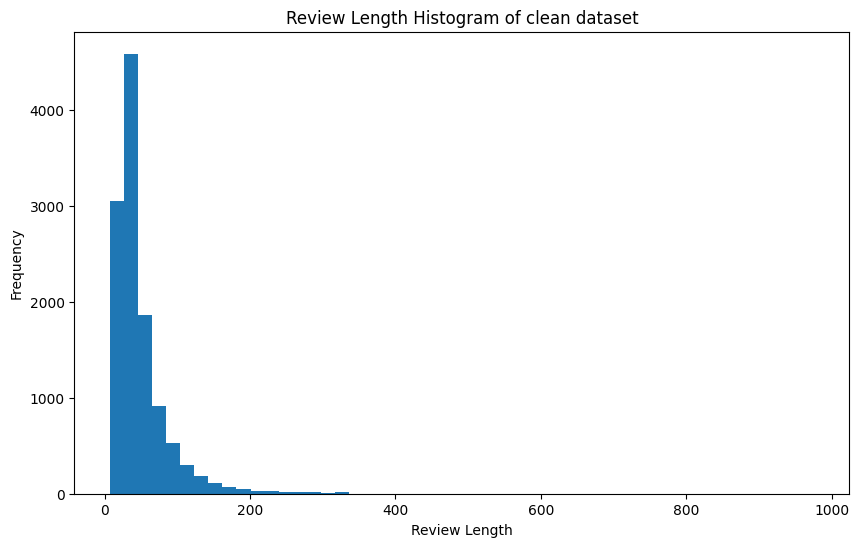

Top 10 most common words: 
[('room', 11725), ('hotel', 10441), ('staff', 8349), ('stay', 6247), ('food', 5900), ('good', 5880), ('place', 5325), ('great', 5052), ('u', 4936), ('view', 4584)]
Top 10 most common bigrams: 
[(('sri', 'lanka'), 1693), (('staff', 'friendly'), 1003), (('highly', 'recommend'), 984), (('sri', 'lankan'), 865), (('room', 'clean'), 841), (('two', 'night'), 749), (('one', 'night'), 701), (('friendly', 'helpful'), 643), (('friendly', 'staff'), 606), (('tuk', 'tuk'), 530)]

Vocab size: 19470
Unique word ratio: 29.72270159219312
Sentiment Word Counts: {'good': 5880, 'bad': 422, 'amazing': 2771, 'terrible': 137}
POS Tag Distribution: Counter({'NN': 255866, 'JJ': 139289, 'RB': 46073, 'VBD': 30721, 'VBG': 21958, 'VBP': 13552, 'CD': 12977, 'VB': 12795, 'VBN': 12400, 'IN': 9324, 'NNS': 5761, 'MD': 5282, 'JJS': 3751, 'DT': 1734, 'VBZ': 1713, 'JJR': 1522, 'RBR': 1011, 'FW': 813, 'NNP': 565, 'CC': 452, 'RP': 436, 'RBS': 278, 'WP': 98, 'WDT': 90, 'WRB': 80, 'PRP': 67, 'WP$': 3

In [72]:
review_text_analysis(df_raw, "raw")
review_text_analysis(df_clean, "clean")

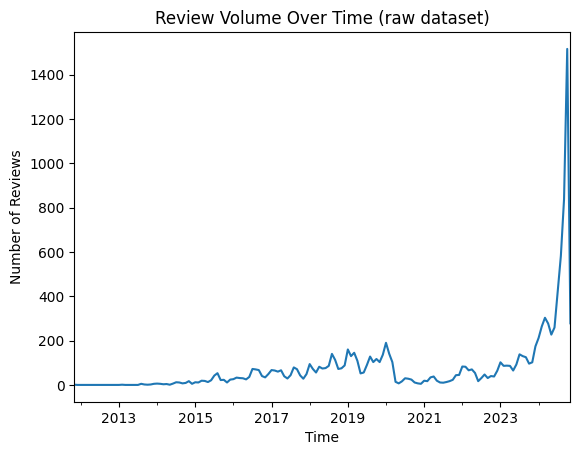

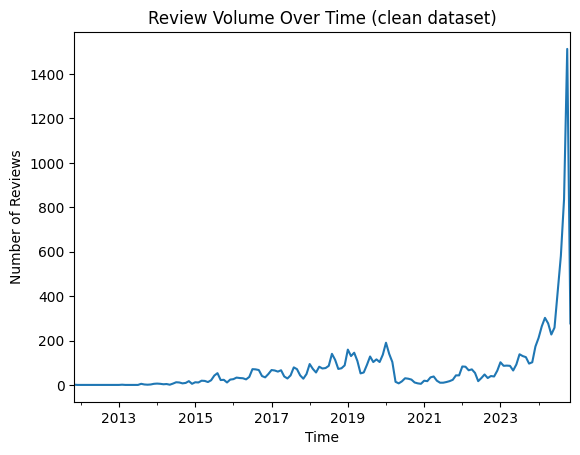

In [75]:
"""Temporal Analysis"""

def publication_distribution(df, dataset_name):
    """
    Prints the distribution of reviews published over time
    """
    df['publishedDate'] = pd.to_datetime(df['publishedDate'])
    df.set_index('publishedDate')['review_text'].resample('ME').count().plot()
    plt.title(f"Review Volume Over Time ({dataset_name} dataset)")
    plt.xlabel("Time")
    plt.ylabel("Number of Reviews")
    plt.show()
    
publication_distribution(df_raw, "raw")
publication_distribution(df_clean, "clean")

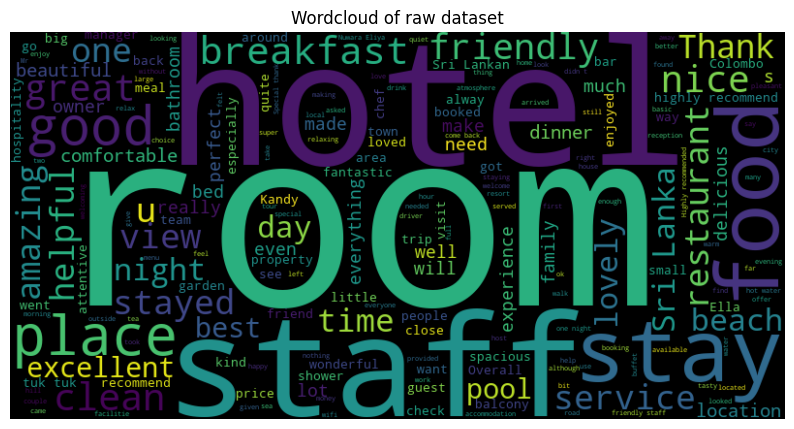

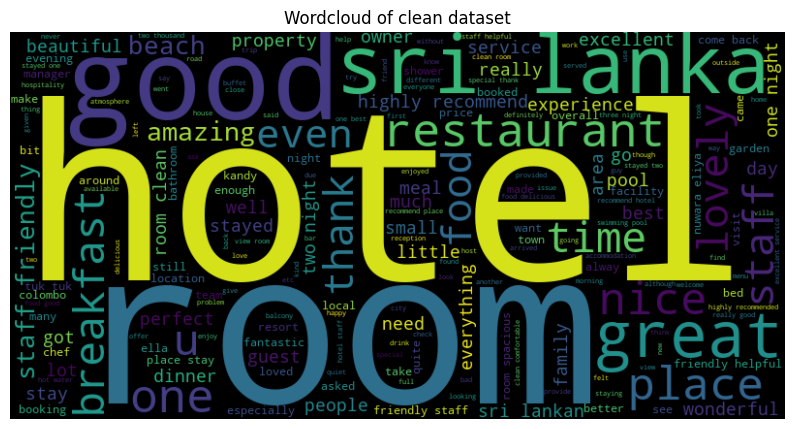

In [78]:
"""Visualzation"""

def plot_wordcloud(data, title):
    """
    Plots a wordcloud of the data
    """
    # Convert data to string and remove NaN values
    text_data = data.dropna().astype(str)
    
    # Join the text data
    text = ' '.join(text_data)
    wordcloud = WordCloud(width=800, height=400).generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show() 
    
plot_wordcloud(df_raw['review_text'], "Wordcloud of raw dataset")
plot_wordcloud(df_clean['review_text'], "Wordcloud of clean dataset")

In [81]:
"""Single-Level Frequency Distribution Analysis"""

def single_level_freq_analysis(df, dataset_name):
    """
    Prints a single-level frequency analysis of the dataset
    """
    print(f"------\nSingle-Level Frequency Analysis of {dataset_name} dataset\n------")
    print(f"Review per City: {df['city'].value_counts()}\n")
    print(f"Review per Trip Type: {df['tripType'].value_counts()}\n")
    print(f"Review per Place Rating: {df['placeRating'].value_counts()}\n")
    print(f"Review per User Rating: {df['userRating'].value_counts()}\n")
    
single_level_freq_analysis(df_raw, "raw")
single_level_freq_analysis(df_clean, "clean")

------
Single-Level Frequency Analysis of raw dataset
------
Review per City: city
Colombo         2000
Ella            1951
Nuwara Eliya    1932
Kandy           1450
Trincomalee      914
Galle            550
Arugam Bay       494
Unawatuna        450
Pottuvil         438
Hikkaduwa        400
Bentota          350
Kundasale        100
Heerassagala     100
Ahungalla        100
Koggala          100
Ahangama          50
Miwaladeniya      50
Ampitiya          50
Werapitiya        50
Rathgama          50
Gurudeniya        50
Wattegama         50
Hantana           50
Kosgoda           50
Name: count, dtype: int64

Review per Trip Type: tripType
COUPLES     4185
FAMILY      3472
FRIENDS     1826
NONE        1042
SOLO         919
BUSINESS     375
Name: count, dtype: int64

Review per Place Rating: placeRating
4.5    5806
4.0    2563
5.0    2136
3.5     884
3.0     399
2.5      40
Name: count, dtype: int64

Review per User Rating: userRating
5.0    8433
4.0    1787
3.0     695
1.0     560
2.0    

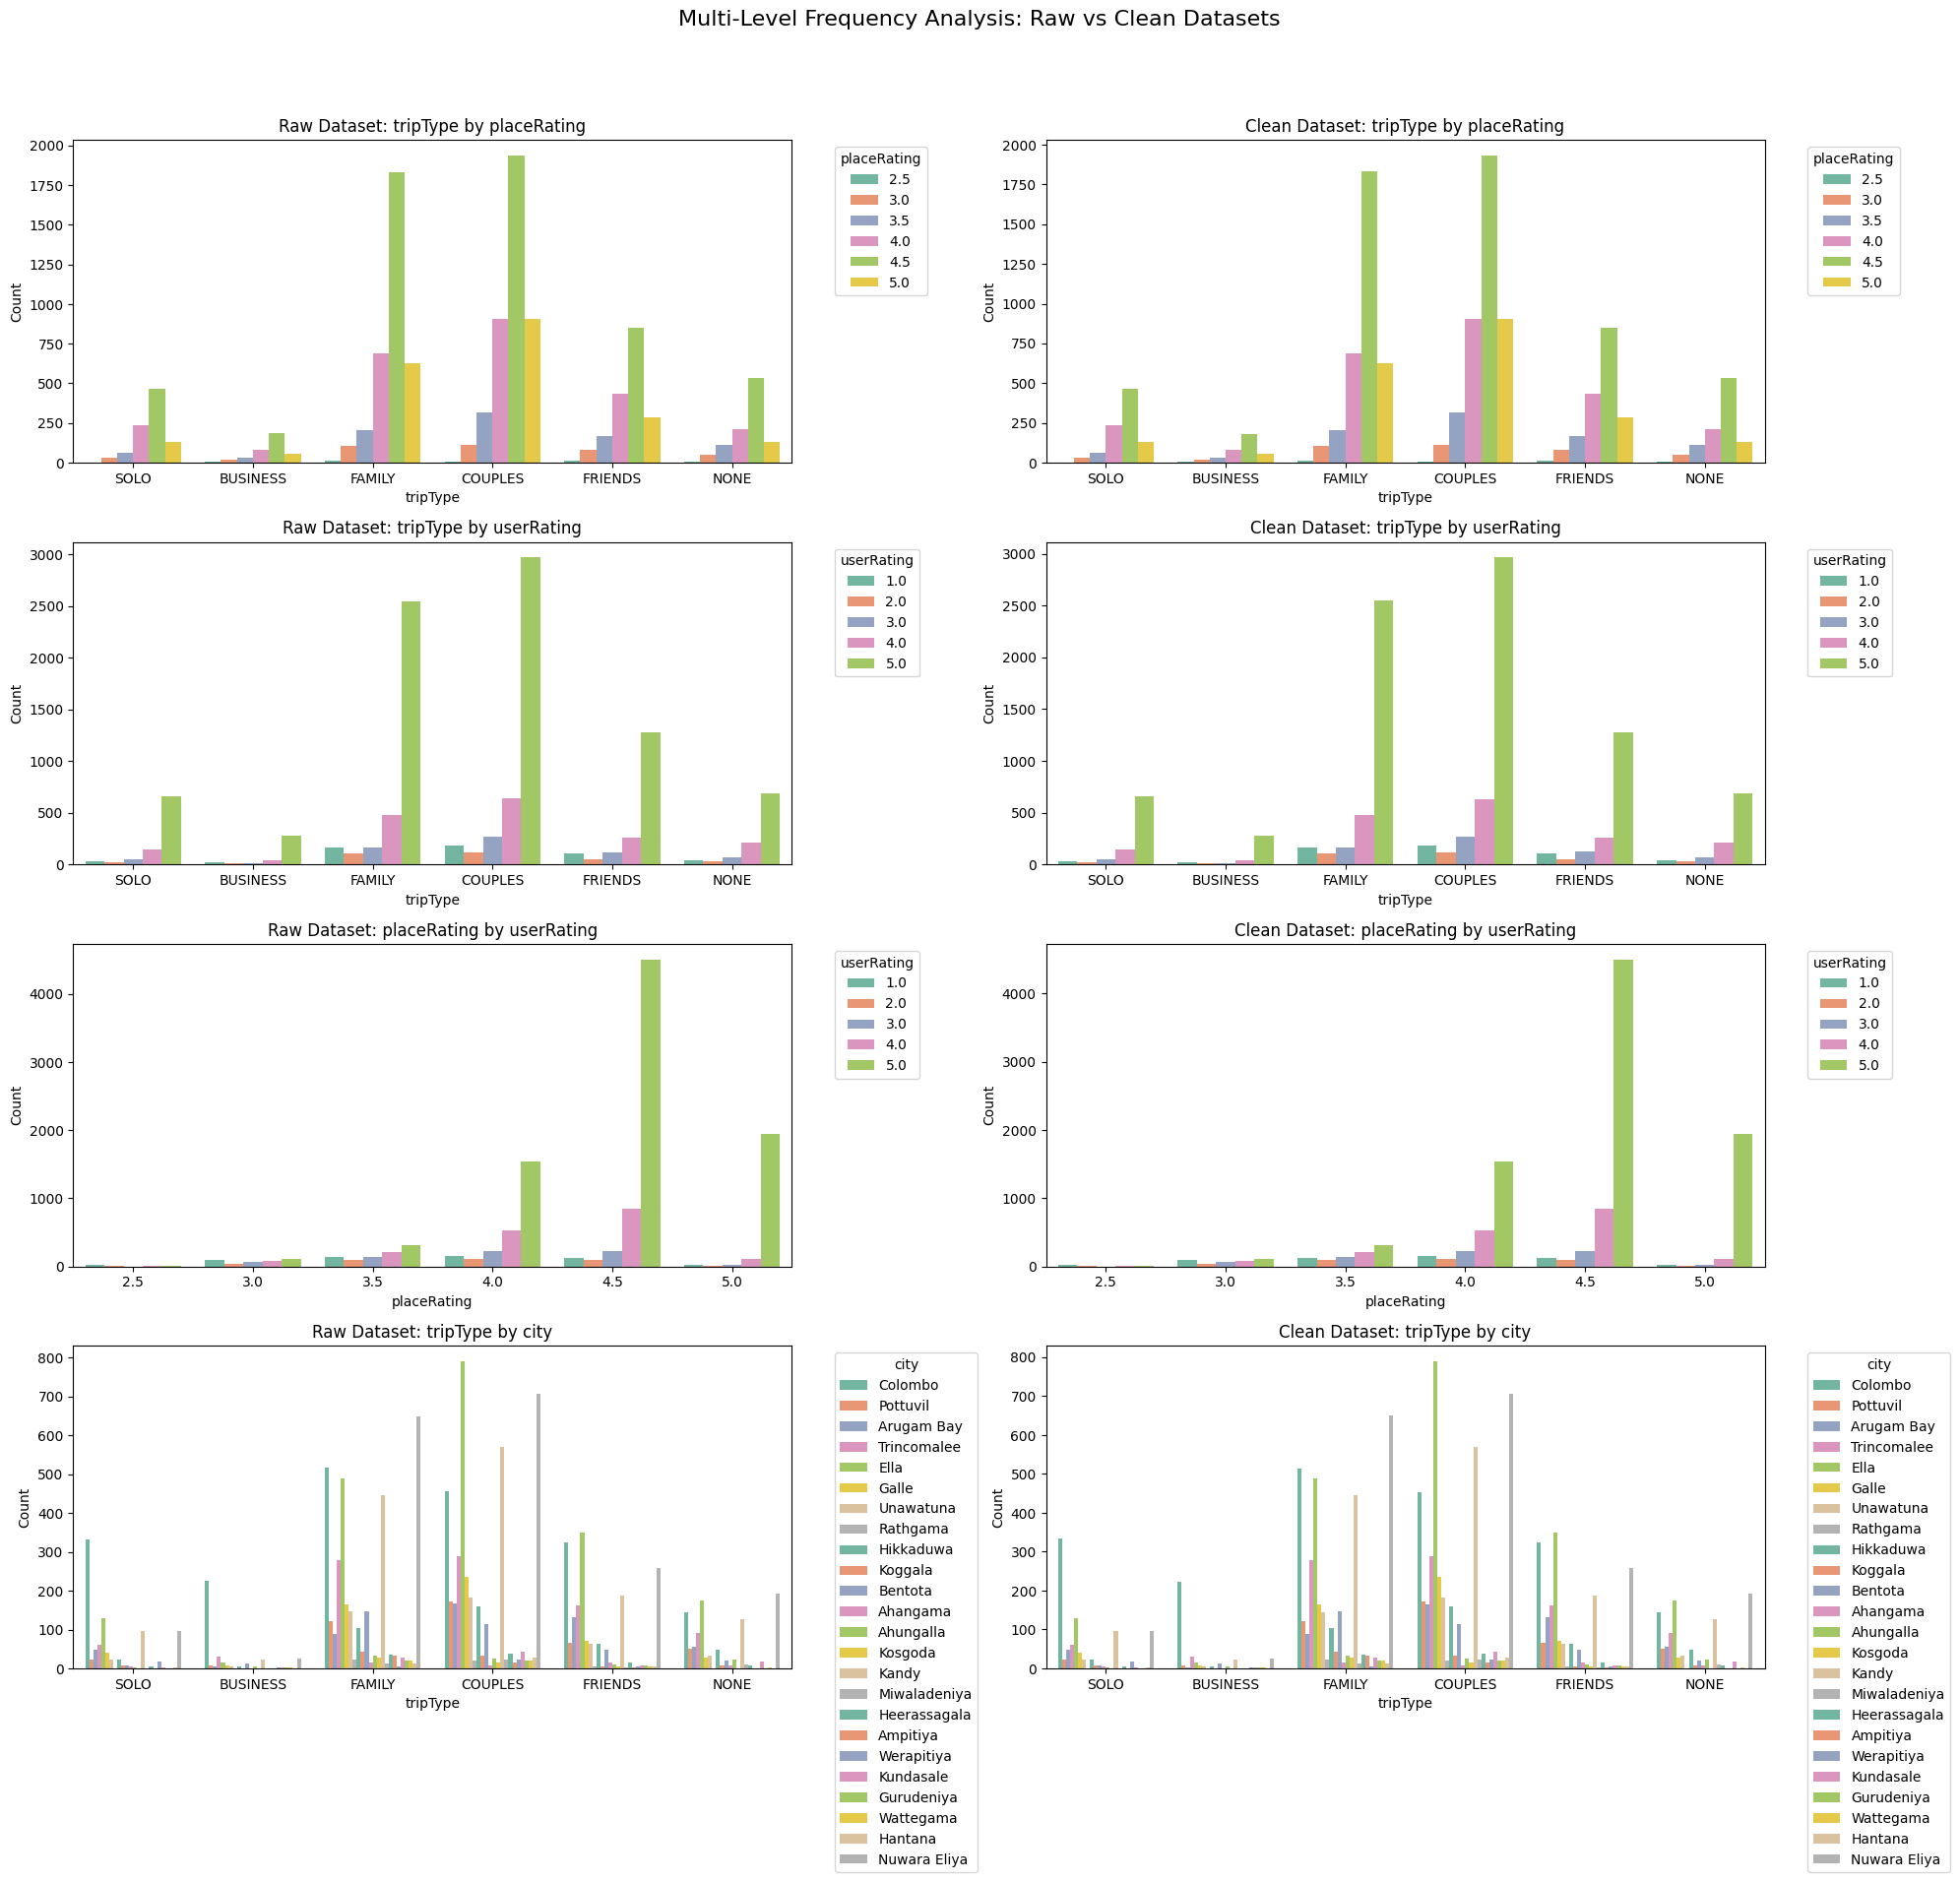

In [83]:
def count_by_group(df, x_ax, group_by, ax):
    """
    Creates a count plot of the data on a given axis
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The input dataframe
    x_ax : str
        Column to plot on x-axis
    group_by : str
        Column to use for hue/grouping
    ax : matplotlib.axes.Axes
        The axis to plot on
    """
    sns.countplot(data=df, x=x_ax, hue=group_by, palette='Set2', ax=ax)
    ax.set_xlabel(x_ax)
    ax.set_ylabel('Count')
    ax.set_title(f'Count of {x_ax}, Grouped by {group_by}')
    ax.legend(title=f'{group_by}', bbox_to_anchor=(1.05, 1), loc='upper left')

def multi_level_freq_analysis(df_raw, df_clean):
    """
    Prints a multi-level frequency analysis of both datasets side by side
    
    Parameters:
    -----------
    df_raw : pandas.DataFrame
        Raw dataset
    df_clean : pandas.DataFrame
        Cleaned dataset
    """
    # Define the plots to create
    plots = [
        ('tripType', 'placeRating'),
        ('tripType', 'userRating'),
        ('placeRating', 'userRating'),
        ('tripType', 'city')
    ]
    
    # Create a figure with subplots
    fig, axes = plt.subplots(len(plots), 2, figsize=(20, 5*len(plots)))
    fig.suptitle('Multi-Level Frequency Analysis: Raw vs Clean Datasets', fontsize=16)
    
    # Iterate through plots and create side-by-side comparisons
    for i, (x_ax, group_by) in enumerate(plots):
        # Raw dataset plot
        count_by_group(df_raw, x_ax, group_by, axes[i, 0])
        axes[i, 0].set_title(f'Raw Dataset: {x_ax} by {group_by}')
        
        # Clean dataset plot
        count_by_group(df_clean, x_ax, group_by, axes[i, 1])
        axes[i, 1].set_title(f'Clean Dataset: {x_ax} by {group_by}')
    
    # Adjust layout and display
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Usage
multi_level_freq_analysis(df_raw, df_clean)

##### Interpretation of EDA

Overall Sentiment: The EDA revealed a strong positive sentiment among hotel guests, reflected in both word counts and sentiment scores.

Key Aspects Mentioned: Frequent mentions of service quality, room cleanliness, staff friendliness, and location highlight these as critical factors influencing guest satisfaction.

Customer Engagement: An increase in reviews over the past two years could suggest growing customer engagement and possibly an uptick in tourism.

Traveler Profiles: Families and Couples are the travelers that constitute the majority, exhibiting higher satisfaction levels compared to business travelers.

Areas for Improvement: Slightly lower satisfaction among business travelers indicates opportunities to enhance services tailored to their needs.

Correlation Insights: The positive correlation between user ratings and place ratings underscores the importance of maintaining high standards in facilities and services to drive guest satisfaction.